# PROYECTO FINAL


## Importacion del dataset y Librerías

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA, KernelPCA


Mounted at /content/gdrive


In [ ]:
df_player=pd.read_excel("/content/gdrive/MyDrive/IA Datasets/NBA_2007.xlsx")
 



"""
pos = posicion dentro del campo - PG "ARMADOR" - SG "ESCOLTA" - SF "ALERO" - C "PIVOT" - PF "POSTE"
Age = Edad
TM = TEAM
G = Partidos Jugados
GS = Partidos en los que fue titular
MP = Minutos jugados 
FG = Tiro de campo
FGA = Intentos de Tiros de Campo
FG% = Porcentaje de tiro de Campo vs Acierto
3P 3PA 3P% = Tiros de 3 puntos, Intentos de 3 Puntos y porcentaje
2P 2PA 2P% = Tiros de 2 puntos, Intentos de 2 Puntos (Incluyendo Bandejas y todos los tiros posibles de 2 Puntos)
eFG = eficiencia
FT FT FT% = Tiros Libres, intentos de tiros libres y porcentaje
ORB DRB TRB = Rebotes ofensivos, defensivos y totales
AST STL BLK = Asistencias, Robos y Bloqueos
TOV = Perdidas
PF =   Faltas personales
PTS = puntos totales
"""
df_player.head(10)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Shareef Abdur-Rahim\abdursh01,C,30,SAC,80,45,25.2,3.9,8.2,0.474,0.0,0.3,0.150,3.8,7.9,0.484,0.476,2.1,2.9,0.726,1.5,3.5,5.0,1.4,0.7,0.5,1.5,3.0,9.9
1,2,Hassan Adams\adamsha01,SG,22,NJN,61,8,8.1,1.2,2.2,0.556,0.0,0.0,0.000,1.2,2.2,0.560,0.556,0.4,0.6,0.667,0.6,0.7,1.3,0.2,0.3,0.1,0.4,0.8,2.9
2,3,Maurice Ager\agerma01,SG,22,DAL,32,1,6.7,0.7,2.2,0.314,0.2,0.5,0.333,0.5,1.7,0.309,0.350,0.6,1.0,0.606,0.0,0.6,0.7,0.2,0.1,0.1,0.5,0.8,2.2
3,4,LaMarcus Aldridge\aldrila01,C,21,POR,63,22,22.1,3.8,7.6,0.503,0.0,0.0,0.000,3.8,7.6,0.505,0.503,1.3,1.8,0.722,2.3,2.7,5.0,0.4,0.3,1.2,0.7,3.0,9.0
4,5,Malik Allen\allenma01,PF,28,CHI,60,1,10.6,1.8,4.3,0.415,0.0,0.0,0.000,1.8,4.3,0.416,0.415,0.5,0.6,0.824,0.7,1.3,2.0,0.3,0.3,0.3,0.4,1.4,4.0
5,6,Ray Allen*\allenra02,SG,31,SEA,55,55,40.3,9.2,21.0,0.438,3.0,8.1,0.372,6.2,12.9,0.479,0.510,5.1,5.6,0.903,1.0,3.5,4.5,4.1,1.5,0.2,2.8,2.1,26.4
6,7,Tony Allen\allento01,SG,25,BOS,33,18,24.4,4.0,7.8,0.514,0.2,1.0,0.242,3.8,6.8,0.553,0.529,3.2,4.1,0.784,1.1,2.7,3.8,1.7,1.5,0.4,2.3,2.6,11.5
7,8,Rafer Alston\alstora01,PG,30,HOU,82,82,37.1,4.7,12.4,0.375,2.3,6.5,0.363,2.3,6.0,0.389,0.470,1.6,2.2,0.734,0.4,3.1,3.4,5.4,1.6,0.1,2.1,2.4,13.3
8,9,Lou Amundson\amundlo01,PF,24,TOT,11,0,8.1,0.5,1.4,0.400,0.0,0.0,NaN,0.5,1.4,0.400,0.400,0.4,0.9,0.400,1.2,1.4,2.5,0.1,0.1,0.7,0.5,1.4,1.5
9,10,Lou Amundson\amundlo01,PF,24,UTA,1,0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Adecuación del Dataset


explicar que vergas se hizo

In [ ]:
#LIMPIAR DATASET
df_player = df_player.drop(["Player","Rk","Tm","Age","GS","eFG%","FT","FTA","ORB","DRB","2P","2PA"],axis= 1)

#Se cambian las posiciones por Numeros
df_player['Pos'] = df_player['Pos'].map({'PG':1, 'SG':2, 'SF':3, 'PF':4, 'C':5,'SG-PG':2, 'PG-SG':1, 'C-PF':4, 'SF-SG':3 },na_action=None)

#Se eliminan 
#df_player = df_player[df_player["MP"].astype(float) > 2]
df_player = df_player.fillna({'3P%': 0})
df_player = df_player.fillna({'FG%': 0})
df_player = df_player.fillna({'2P%': 0})
df_player = df_player.fillna({'FT%': 0})

##Escalizacion de los Datos

explicar que vergas se hixo

In [ ]:

X = df_player.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print (X)

[[ 1.39650437  1.12540672  0.44569636 ...  0.30644437  1.26102488
   0.28818252]
 [-0.72728841  0.37782982 -1.1519662  ... -1.00037624 -1.34742163
  -0.82438189]
 [-0.72728841 -0.76320861 -1.28276898 ... -0.88157436 -1.34742163
  -0.93563833]
 ...
 [-0.72728841 -1.27470859 -0.97444814 ... -1.11917811 -1.94025039
  -0.72901923]
 [-0.01935749  0.57456058 -0.07751477 ... -0.287565   -0.28032988
  -0.33167479]
 [ 1.39650437  0.61390673 -0.46992312 ... -0.76277249  1.26102488
  -0.87206322]]


## Análisis por componentes principales (PCA)

ke vergas se hixo

In [ ]:
#SELECCION OPTIMA DE NUMERO DE COMPONENTES 
ratio =[]
componentes = []
for n in range(1,20):
    pca = decomposition.PCA(n_components=n,whiten=True,svd_solver='arpack')
    pca.fit(X)
    suma = sum(pca.explained_variance_ratio_)
    
    ratio.append(suma)
    componentes.append(n)

plt.figure()
plt.xlabel('Numero de Componentes')
plt.ylabel('Variance Ratio')
plt.scatter(componentes, ratio)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
plt.xticks(range(1,20))

    

ValueError: ignored

In [ ]:
pca = decomposition.PCA(n_components=10,whiten=True,svd_solver='arpack')
pca.fit(X)
X=pca.transform(X)


ValueError: ignored

## K medias

### Seleccion del K optimo

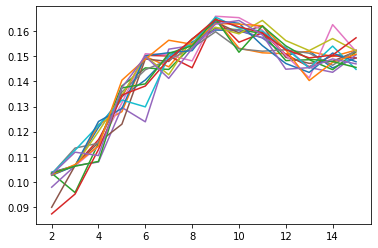

In [ ]:
for random_state in range(1,16):
  kinicial=2
  kfinal=1+15
  step=1
  Silueta=[]
  K=[]
  for k in range(kinicial,kfinal,step):
    kmedias = KMeans(n_clusters=k,random_state=random_state,
                      init='k-means++', #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
                      n_init=20, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
                      max_iter=300, #máximo nuero de iteraciones
                      tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
                      copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso, ver mas detalles en la función
              #n_jobs='deprecated', #will be removed in 0.25
                      algorithm='auto') # Note que esta implementación de K-means solo usa una corrida del algoritmo, no proteje contra minimos locales en la solución
    kmedias.fit(X)
    Labels=kmedias.predict(X)
    Silueta.append(silhouette_score(X, Labels, metric = 'euclidean'))
    K.append(k)  
  #print(Silueta)
  plt.plot(K,Silueta)

plt.show()

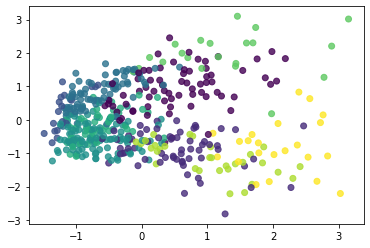

In [ ]:
kmedias = KMeans(n_clusters=9,random_state=random_state,
                      init='k-means++', #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
                      n_init=20, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
                      max_iter=300, #máximo nuero de iteraciones
                      tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
                      copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso, ver mas detalles en la función
              #n_jobs='deprecated', #will be removed in 0.25
                      algorithm='auto') # Note que esta implementación de K-means solo usa una corrida del algoritmo, no proteje contra minimos locales en la solución
kmedias.fit(X)
Labels=kmedias.predict(X)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Labels,alpha=0.8)
plt.show()

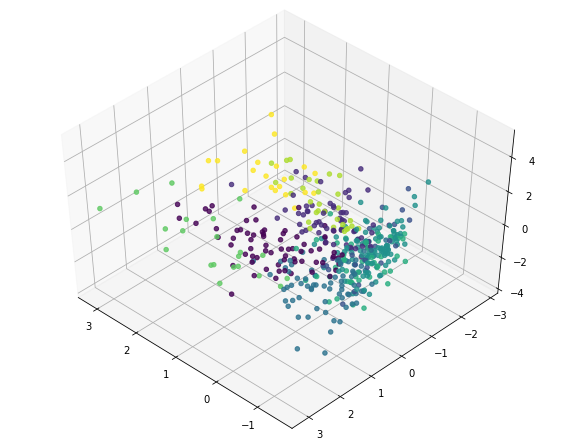

In [ ]:

#Preparar figura 3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Labels, alpha=0.8)


plt.show()